# Hypothesis Testing
## Research Question:

<img src="https://a.espncdn.com/photo/2022/1014/fc_nba_gm_1296x729.jpg" alt="fc_nba_gm_1296x729.jpg" width=648 height=364/>


### Considering NBA players from the 2021-2022 season, do veteran players have significantly higher mean points per game (PPG) than non-veterans?
--------------

Looking at the sample data we may observe that non-veteran players have more PPG than veteran players, but what is the probability that the observed effect would have occurred due to the sampling error alone, due by chance?

To be sure, we have to do a hypothesis test:

### Steps to perform a hypothesis test

1. Define null and alternative hypotheses
2. Examine data, check assumptions, and calculate the test statistic
3. Determine the corresponding p-value
4. Make a decision about the null hypothesis

#### 1. Define null and alternative hypotheses

 Let's assume young players are under 25 years old and veterans are over or equal to 25 years old. So:

#### **Null Hypothesis $H_0$**: The mean PPG of non-veteran players ($\mu_y$) is less or equal to the mean PPG of veteran players ($\mu_v$). 

$$
\mu_y \leq \mu_v
$$

$$ 
\mu_y - \mu_v \leq 0 
$$

#### **Alternative Hypothesis $H_1$**: The mean PPG of non-veteran players is greater than the mean PPG of veteran players

$$
\mu_y > \mu_v
$$

$$ 
\mu_y - \mu_v > 0 
$$

### 2.1 Examine data and check assumptions.
-------

#### 2.1.1 Examine the data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import numpy as np

nba = pd.read_csv('nba_players_stats2122_regular.csv', sep=';', encoding='ISO-8859-1')

In [28]:
nba = nba.rename(columns=str.lower)

In [29]:
nba

,rk,player,pos,age,tm,g,gs,mp,fg,fga,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Checking if there are null values and duplicated rows.

In [30]:
if not nba.isnull().any().any():
    print("No NANs")


No NANs


In [31]:
if not nba.duplicated().any():
    print("No duplicates")

No duplicates


Checking how many players are duplicated (played for different teams).

In [32]:
nba[nba.duplicated(['player'])]

,rk,player,pos,age,tm,g,gs,mp,fg,fga,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,6,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
12,10,Justin Anderson,SF,28,CLE,3,0,15.7,1.3,2.7,...,0.750,0.0,2.0,2.0,2.0,0.3,0.0,0.7,1.3,4.3
13,10,Justin Anderson,SF,28,IND,13,6,20.7,2.5,6.7,...,0.800,0.3,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8
23,19,D.J. Augustin,PG,34,HOU,34,2,15.0,1.6,4.0,...,0.868,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,593,Justise Winslow,SF,25,POR,11,10,26.8,4.3,10.5,...,0.560,1.8,4.5,6.3,2.9,1.3,0.6,1.1,1.9,10.7
802,599,Moses Wright,PF,23,LAC,1,0,1.0,0.0,0.0,...,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
803,599,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,...,1.000,0.3,0.7,1.0,0.3,0.0,0.3,0.0,0.0,1.7
806,601,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,...,0.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1


207 players played for different teams. We'll remove all duplicate names and leave the "TOT" team, the player's summarized statistics.

In [33]:
nba = nba.drop(nba[nba.duplicated(['player'])].index)

In [34]:
nba

,rk,player,pos,age,tm,g,gs,mp,fg,fga,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,0.469,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


#### 2.1.2 Checking the assumptions
- Samples are considered simple random samples
- Samples are independent from one another
- Both populations of responses are approximately normal (or sample sizes are both 'large' enough, so we apply the Central Limit Theorem).

##### It was considered to be a **young player** a player under 25 years of age because, according to [HOOPSRUMORS](https://www.hoopsrumors.com/2022/07/rookie-scale-salaries-for-2022-nba-first-round-picks.html#:~:text=Rookie%20scale%20contracts%20are%20guaranteed,the%20third%20and%20fourth%20years.):, "*Rookie scale contracts are guaranteed for the first two years, with team options on the **third** and **fourth** years.*". So, here, we are going to add up about 2 years of experience and arrive at age 24/25. And veteran, a player aged 25 or more.

In [35]:
youngs = nba[nba.age < 25]
veterans = nba[nba.age >= 25]

In [36]:
sample_y = youngs.sample(120)
sample_v = veterans.sample(120)

#### Age distribution

##### Veterans

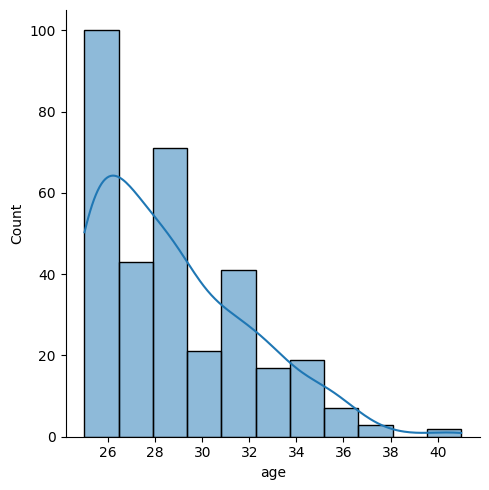

In [37]:
sns.displot(nba.age[nba.age >= 25], kde=True)

##### Non-veterans

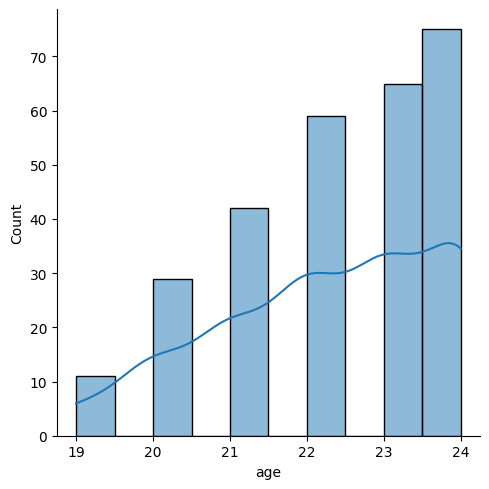

In [38]:
sns.displot(nba.age[nba.age < 25], kde=True)

- The samples are considered simple random samples, randomly selected subsets of the population.
- Samples are independent of one another (non-veterans and veterans **are not related**).
- Sample sizes are both large enough, **120** observations.

### 2.2 Calculating the test statistic
------

In [39]:
mu_y = sample_y.pts.mean()
mu_v = sample_v.pts.mean()

##### **Pooled approach**:

- The variance of the two **populations** are assumed to be equal ($\sigma^2_y = \sigma^2_v$):

##### **Unpooled approach**: 

- The assumption of equal variances is dropped.

For that, we are going to use Levene's test to assess the equality of the variances.

In [40]:
from scipy.stats import levene

stat, p = levene(sample_y.pts, sample_v.pts)
p > 0.05

True

Now, we can use the pooled approach.

In [41]:
def se_pooled(std1, std2, n1, n2):
    sp = np.sqrt(((n1 - 1)*(std1**2) + (n2 - 1)*(std2**2)) / (n1 + n2 - 2))
    std_error = (sp * np.sqrt((1/n1) + (1/n2))) 
    
    return std_error

def se_unpooled(std1, std2, n1, n2):
    se1 = std1 / np.sqrt(n1)
    se2 = std2 / np.sqrt(n2)

    std_error = np.sqrt((se1**2) + (se2**2))

    return std_error


In [42]:
#estimates
mu_d = mu_y - mu_v

std_y = sample_y.pts.std()
std_v = sample_v.pts.std()

n_y = len(sample_y)
n_v = len(sample_v)

std_error_p = se_pooled(std_y, std_v, n_y, n_v)
std_error_unp = se_unpooled(std_y, std_v, n_y, n_v)

std_error = std_error_p

So, with 95% of confidence, our best estimate is that the population mean will fall between the interval:

In [43]:
print((round(mu_d - 1.96*std_error, 3), round(mu_d + 1.96*std_error, 3)))
print(round(mu_d, 3), "+-", round(1.96*std_error, 3))

(-2.006, 1.123)
-0.442 +- 1.565


> If we keep sampling the data, 95% of the intervals will contain the true parameter.

#### We are going to normalize the data to measure **how far** our sample statistic is from our hypothesized population parameter, in terms of **estimated** standard errors:
- Formula: Best estimate **minus** the hypothesized estimate, **all divided** by the standard error of the estimate.
- Best estimate = $\mu_y - \mu_v$
- Hypothesized estimate = $0$
$$
\frac{(\mu_y - \mu_v) - 0} {se(\hat{\mu_d})}
$$

In [44]:
z = (mu_d - 0) / std_error
z

-0.5532804250942561

Our difference in sample means is approximately 0.553 standard errors below the null difference of 0 pts/g.

### 3. Visualization and calculating the p-value
-------

Since we have 120 samples, we are going to use the **z-test** to facilitate the calculation and the visualization.

Now, we're going to create normal distributions for visualization purposes:

In [45]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [46]:
class Normal:
    def __init__(self, mu: float=0, sigma: float=1):
        self.mu = mu
        self.sigma = sigma
        self.xs=[]
        self.probs = []

    def get_proba(self, x: float):
        return normal_pdf(x, self.mu, self.sigma)

    def create(self):
        self.xs=np.linspace(-4 * self.sigma + self.mu, 4 * self.sigma + self.mu)
        self.probs = [self.get_proba(x) for x in self.xs]

In [47]:
def normal_prob_between(normal: Normal, lo: float, hi: float):
    upper_bound_density = normal_cdf(hi, normal.mu, normal.sigma)
    lower_bound_density = normal_cdf(lo, normal.mu, normal.sigma)

    return upper_bound_density - lower_bound_density

def normal_prob_outside(normal: Normal, lo: float, hi: float):
    return 1 - normal_prob_between(normal, lo, hi)

def normal_prob_under(normal: Normal, hi: float):
    return normal_cdf(hi, normal.mu, normal.sigma)

def normal_prob_above(normal: Normal, lo: float):
    return 1 - normal_prob_under(normal, lo)

In [48]:
import matplotlib.pyplot as plt

def plot_normal(normal: Normal, interval=()):
    x, y = normal.xs, normal.probs
    sns.lineplot(x=x, y=y)
                    
    
    if any(interval):
        plt.fill_between(x, y, where=(x >= interval[0]) & (x <= interval[1]))
    plt.title("Standard Normal Distribution")
    plt.show()

$ \mu_d = \mu_y - \mu_v $

If the null hypothesis ($\mu_d \leq 0$) were true, would a test statistic value of -0.553 be unusual enough to reject the null?

**p-value**: assuming the null hypothesis is true, it is the probability of observing a test statistic of **-0.553 or more extreme**.

Since our alternative hypothesis is that **$\mu_d > 0$**, then we should get the area above the z value, which will be our **p-value**.

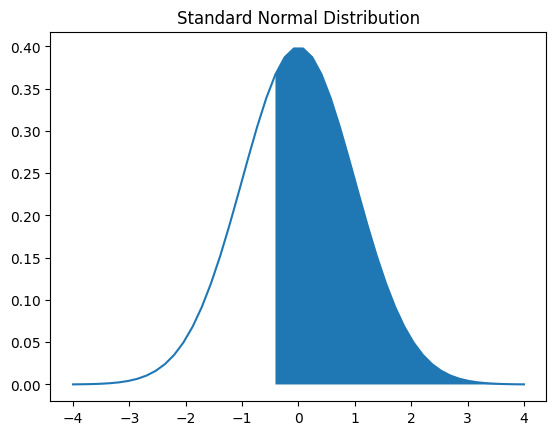

In [49]:
normal_std = Normal()
normal_std.create()

plot_normal(normal_std, interval=(z, 5))

Our significance level $\alpha$ is going to be equal to 0.05, which is the probability of the study rejecting the null hypothesis, given that it is true.

In [53]:
print(f"the best estimate is ~ {abs(z):.3f} std errors below the mean ")

the best estimate is ~ 0.553 std errors below the mean 


In [51]:
p = normal_prob_above(normal_std, z)
p

0.7099642985516907

 - $ p$-$value \approx 0.710 > 0.05 = \alpha$    $\rightarrow$ not able to reject the null hypothesis.

A value of `~0.553` standard errors below the mean or more extreme is very likely to occur assuming the null hypothesis is true. Then, we cannot reject the null hypothesis.

### 4. Decision about the null hypothesis
-----

Based on our estimated difference in sample means, there is not enough evidence to support that the mean PPG of non-veteran players is significantly higher than the mean PPG of veteran players.

### **BONUS**: Testing with **scipy** to check correctness.

In [52]:
from scipy.stats import ttest_ind

ttest_ind(sample_y.pts, sample_v.pts, alternative='greater')

Ttest_indResult(statistic=-0.553280425094256, pvalue=0.7097046234155064)

The p-value calculated is very similar, almost the same as the one we calculated.